In [80]:
cd("C:/Users/JOHN VEGA/Documents/Machine Learning")

## 1. Split the data into training and test (consider class imbalance).
In first place, the data is charged, and It's separated in $R$ from $Rocks$ and $M$ from $Mines$ to determinate the size for the cases. The $Nmr$ vector show $97$ $R$ entrys and $111$ $M$ entrys.

In [81]:
using CSV
using DataFrames

dataradar = CSV.read("data/sonar.csv",DataFrame);
dataradar.b
R_data=filter(:b=>x->x=="R",dataradar)
M_data=filter(:b=>x->x=="M",dataradar)
Nmr=[size(R_data.b)[1] size(M_data.b)[1]]

1×2 Matrix{Int64}:
 97  111

The data is splited in $4$ groups, the $85%$ of the $R$ and the $M$ entrys are chossen randomly to the Training data, the remaining $15%$ of each go to the Test data.
The $Sizes$ matrix shows the number of entrys for each of the $4$ groups 

In [82]:
R_order=rand(Float64, (Nmr[1],1));
M_order=rand(Float64, (Nmr[2],1));
R_data.order.=R_order;
M_data.order.=M_order;
sort!(R_data, :order);
sort!(M_data, :order);
[issorted(R_data. :order) issorted(M_data, :order)];
R_trainS= floor(Int, Nmr[1]*0.85)
R_train=first(R_data, R_trainS)
M_trainS= floor(Int, Nmr[2]*0.85)
M_train=first(M_data, M_trainS)
R_testS= ceil(Int, Nmr[1]*0.15)
R_test=last(R_data, R_testS)
M_testS= ceil(Int, Nmr[2]*0.15)
M_test=first(M_data, M_testS)
Sizes=[R_trainS R_testS; M_trainS M_testS]

2×2 Matrix{Int64}:
 82  15
 94  17

In [83]:
radar_train=vcat(R_train,M_train)
radar_test=vcat(R_test,M_test)

,a1,a2,a3,a4,a5,a6,a7,a8,a9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0201,0.0026,0.0138,0.0062,0.0133,0.0151,0.0541,0.021,0.0505
2,0.019,0.0038,0.0642,0.0452,0.0333,0.069,0.0901,0.1454,0.074
3,0.027,0.0092,0.0145,0.0278,0.0412,0.0757,0.1026,0.1138,0.0794
4,0.0365,0.1632,0.1636,0.1421,0.113,0.1306,0.2112,0.2268,0.2992
5,0.0298,0.0615,0.065,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459
6,0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847
7,0.0099,0.0484,0.0299,0.0297,0.0652,0.1077,0.2363,0.2385,0.0075
8,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235
9,0.0274,0.0242,0.0621,0.056,0.1129,0.0973,0.1823,0.1745,0.144


## 2. Choose a performance function suitable for the problem.

I think its neccesary take a performance function that would be decreasing in the false negatives $(FN)$ predictions, since assume there is a rock where is a mine its very dangerous. So for the false negatives $(FN)$, false positives $(FP)$, true positives $(TP)$ and true negatives $(TN)$ there are Precision function $f_p(\cdot)$,  Recall function $f_r(\cdot)$ and Accuracy function $f_a(\cdot)$.

$$f_p(TP,FP)=\frac{TP}{TP+FP}$$
$$f_r(TP,FN)=\frac{TP}{TP+FN}$$
$$f_a(TP,TN,FP,FN)=\frac{TP+TN}{TP+TN+FP+FN}$$

So I choose the Recall function as first criteria and the Accuracy function in tie case.

## 3. Adjust the following algorithms to the data using the default parameters.
### 3.a. SVM 
For the two SVM models was used the LIBSVM library

First are applied two models of support vector machine (SVM), in the first one ($SVM1$) none Kernel function is aplied.

In [263]:
using LIBSVM
using RDatasets
using Printf
using Statistics
using ROCAnalysis
using MLBase
Xtest = Matrix(radar_test[:, 1:60])'
Xtrain = Matrix(radar_train[:, 1:60])'
ytrain=radar_train.b
ytest=radar_test.b
model = svmtrain(Xtrain, ytrain)
ŷ, decision_values = svmpredict(model, Xtest);
predy1_SVM=[if x=="R" 0 else 1 end for x in ŷ]

32-element Vector{Int64}:
 1
 1
 0
 1
 0
 1
 0
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

after this it's calculated the accuracy ($68,75\%$), recall ($100\%$) and precision ($62,96\%$)

In [265]:
confusion_matrix_SVM1 = MLBase.roc(vec(Int.(b_test)), 
                              predy1_SVM)
SVM1_precision = confusion_matrix_SVM1.tp/(confusion_matrix_SVM1.tp+confusion_matrix_SVM1.fp)*100;
SVM1_recall = confusion_matrix_SVM1.tp/(confusion_matrix_SVM1.tp+confusion_matrix_SVM1.fn)*100;
SVM1_accuracy = (confusion_matrix_SVM1.tp+confusion_matrix_SVM1.tn)/(confusion_matrix_SVM1.tp+confusion_matrix_SVM1.fp+confusion_matrix_SVM1.tn+confusion_matrix_SVM1.fn)*100
[SVM1_precision SVM1_recall SVM1_accuracy]

1×3 Matrix{Float64}:
 62.963  100.0  68.75

For the model ($SVM2$) were tried, polynomial kernel of 2 a 3 grade and lineal kernel, was chossen the lineas since it is the one with best performance for the test data

In [249]:
model2 = svmtrain(Xtrain, ytrain, kernel=LIBSVM.Kernel.Linear)
ŷ2, decision_values = svmpredict(model2, Xtest);
predy2_SVM=[if x=="R" 0 else 1 end for x in ŷ2]

32-element Vector{Int64}:
 0
 0
 0
 0
 0
 1
 1
 0
 0
 1
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [266]:
confusion_matrix_SVM2 = MLBase.roc(vec(Int.(b_test)), 
                              predy2_SVM)
SVM2_precision = confusion_matrix_SVM2.tp/(confusion_matrix_SVM2.tp+confusion_matrix_SVM2.fp)*100;
SVM2_recall = confusion_matrix_SVM2.tp/(confusion_matrix_SVM2.tp+confusion_matrix_SVM2.fn)*100;
SVM2_accuracy = (confusion_matrix_SVM2.tp+confusion_matrix_SVM2.tn)/(confusion_matrix_SVM2.tp+confusion_matrix_SVM2.fp+confusion_matrix_SVM2.tn+confusion_matrix_SVM2.fn)*100
[SVM2_precision SVM2_recall SVM2_accuracy]

1×3 Matrix{Float64}:
 83.3333  88.2353  84.375

### 3.b. Least squares
Now the labels $R$ and $M$ from the data are changed for $0$ and $1$ respectively, with this is calculated a least squares model in this the valors estimated by the model up from $0,5$  were assigned a value of $1$, that is, labeled as $M$, in the same way, the valors down from $0,5$ were assigned with $0$

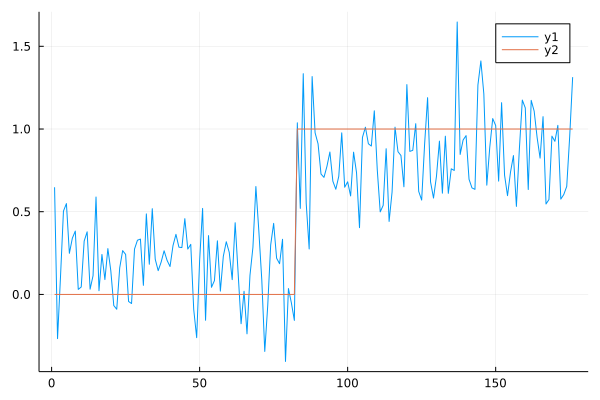

In [287]:
using Plots
N=size(ytrain)[1]
b=ones(N,1)
for i=1:N
    if ytrain[i,1]=="R"
        b[i,1]=0
    end
end
b
β=[ones(N,1) Xtrain']\b;
b_e = [ones(N,1) Xtrain']*β;
err=b_e-b
err'*err
plot(1:N,[b_e,b])


In [284]:
b

176×1 Matrix{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

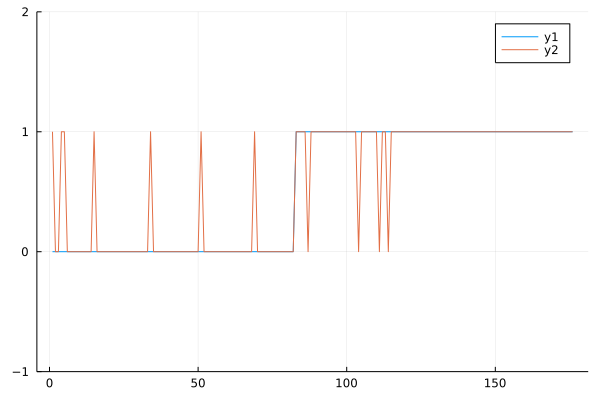

In [288]:
b_e2=b_e
for i=1:N
    if b_e[i,1]<0.5
        b_e2[i,1]=0
    else
        b_e2[i,1]=1
    end
end
plot(1:N,[b,b_e2], ylims = (-1, 2))



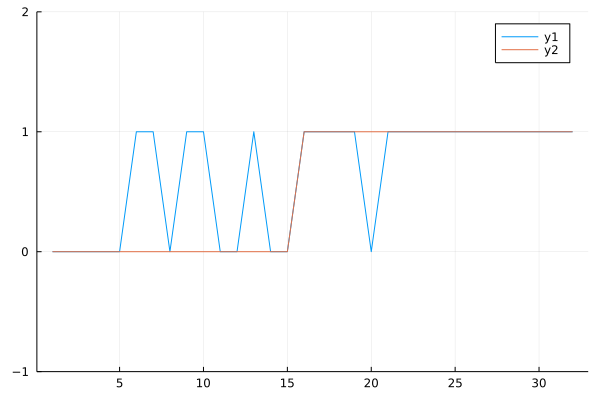

In [291]:
Nt=size(ytest)[1]
b_test=ones(Nt,1)
for i=1:Nt
    if ytest[i,1]=="R"
        b_test[i,1]=0
    end
end
b_et = [ones(Nt,1) Xtest']*β;
for i=1:Nt
    if b_et[i,1]<0.5
        b_et[i,1]=0
    else
        b_et[i,1]=1
    end
end
plot(1:Nt,[b_et,b_test], ylims = (-1, 2))

In [293]:
confusion_matrix_ls = MLBase.roc(vec(Int.(b_test)), vec(Int.(b_et)))
ls_precision = confusion_matrix_ls.tp/(confusion_matrix_ls.tp+confusion_matrix_ls.fp)*100
ls_recall = confusion_matrix_ls.tp/(confusion_matrix_ls.tp+confusion_matrix_ls.fn)*100
ls_accuracy = (confusion_matrix_ls.tp+confusion_matrix_ls.tn)/(confusion_matrix_ls.tp+confusion_matrix_ls.fp+confusion_matrix_ls.tn+confusion_matrix_ls.fn)*100
[ls_precision ls_recall ls_accuracy]

1×3 Matrix{Float64}:
 76.1905  94.1176  81.25

### 3.c. Logistic regretion
For this model is used again the $0$ and $1$ parametrization for the $R$ and $M$ labels, and the probabilities give by the regretion assign the $R$ and $M$ labels for the test data.

For this model is used mainly the GLM package

In [162]:
using Lathe
using GLM
using MLBase
radar_train.y=vec(b)
fm = @formula(y ~ a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10 + a11 + a12 + a13 + a14 + a15 + a16 + a17 + a18 + a19 + a20 + a21 + a22 + a23 + a24 + a25 + a26 + a27 + a28 + a29 + a30 + a31 + a32 + a33 + a34 + a35 + a36 + a37 + a38 + a39 + a40 + a41 + a42 + a43 + a44 + a45 + a46 + a47 + a48 + a49 + a50 + a51 + a52 + a53 + a54 + a55 + a56 + a57 + a58 + a59 + a60 );
logit = glm(fm, radar_train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10 + a11 + a12 + a13 + a14 + a15 + a16 + a17 + a18 + a19 + a20 + a21 + a22 + a23 + a24 + a25 + a26 + a27 + a28 + a29 + a30 + a31 + a32 + a33 + a34 + a35 + a36 + a37 + a38 + a39 + a40 + a41 + a42 + a43 + a44 + a45 + a46 + a47 + a48 + a49 + a50 + a51 + a52 + a53 + a54 + a55 + a56 + a57 + a58 + a59 + a60

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                   Coef.      Std. Error      z  Pr(>|z|)        Lower 95%       Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)   -49.5734     22532.1        -0.00    0.9982   -44211.6         44112.5
a1            285.718          2.77047e5   0.00    0.999

In [294]:
p_logit = GLM.predict(logit, radar_test)
predy_logit = [if x < 0.5 0 else 1 end for x in p_logit]
confusion_matrix_logit = MLBase.roc(vec(Int.(b_test)), 
                              predy_logit)
logit_precision = confusion_matrix_logit.tp/(confusion_matrix_logit.tp+confusion_matrix_logit.fp)*100
logit_recall = confusion_matrix_logit.tp/(confusion_matrix_logit.tp+confusion_matrix_logit.fn)*100
logit_accuracy = (confusion_matrix_logit.tp+confusion_matrix_logit.tn)/(confusion_matrix_logit.tp+confusion_matrix_logit.fp+confusion_matrix_logit.tn+confusion_matrix_logit.fn)*100
[logit_precision logit_recall logit_accuracy]

1×3 Matrix{Float64}:
 77.2727  100.0  84.375

### 3.d. Decision Tree 
In this tipe of model is not necessary change the labels for binary data.

For this model is used mainly the DecisionTree package

In [260]:
using DecisionTree
features=Xtrain'
labels=ytrain
features = float.(features)
labels   = string.(labels)
model_tree = build_tree(labels, features)

Decision Tree
Leaves: 12
Depth:  7

In [295]:
print_tree(model_tree)

Feature 11, Threshold 0.17885
L-> Feature 4, Threshold 0.044950000000000004
    L-> R : 43/43
    R-> Feature 45, Threshold 0.16155
        L-> Feature 24, Threshold 0.95945
            L-> R : 11/11
            R-> M : 2/2
        R-> M : 8/8
R-> Feature 45, Threshold 0.26365
    L-> Feature 36, Threshold 0.5500499999999999
        L-> Feature 23, Threshold 0.7845500000000001
            L-> Feature 42, Threshold 0.27144999999999997
                L-> Feature 40, Threshold 0.19515
                    L-> Feature 39, Threshold 0.0903
                        L-> R : 2/2
                        R-> M : 7/7
                    R-> Feature 52, Threshold 0.0245
                        L-> R : 13/13
                        R-> M : 1/1
                R-> M : 14/14
            R-> M : 32/32
        R-> R : 13/13
    R-> M : 30/30


In [214]:
predy_tree = apply_tree(model_tree, Xtest')
confusion_matrix_tree=DecisionTree.confusion_matrix(ytest, predy_tree)

2×2 Matrix{Int64}:
 17   0
  1  14

Classes:  ["M", "R"]
Matrix:   
Accuracy: 0.96875
Kappa:    0.937007874015748

In [310]:
tp_tree=confusion_matrix_tree.matrix[1,1];
tn_tree=confusion_matrix_tree.matrix[2,2];
fp_tree=confusion_matrix_tree.matrix[2,1];
fn_tree=confusion_matrix_tree.matrix[1,2];
tree_recall=tp_tree/(tp_tree+fn_tree)*100
tree_accuracy=(tp_tree+tn_tree)/(tp_tree+fn_tree+tn_tree+fp_tree)*100
tree_precision=tp_tree/(tp_tree+fp_tree)*100
[tree_precision tree_recall tree_accuracy]

1×3 Matrix{Float64}:
 94.4444  100.0  96.875

### 4. Select the algorithm with the highest performance measure.
### 5. Report the performance on the test data.

In the $performance$ dataframe is show the model performance for the functions mentioned before. As I said in the second point the first critria will be the recall function, for this reason the $SVM2$ model and the Least squares model are discared. The other models have a 100% recall, but the model with highest accuracy is the Decision Tree model, for this reason this is the one choseen

In [309]:
BT=["function" "LOGISTIC" "SV1" "SVM2" "TREE" "LEAST SQUARES"]
A=["recall" logit_recall SVM1_recall SVM2_recall tree_recall ls_recall;
"accuracy" logit_accuracy SVM1_accuracy SVM2_accuracy tree_accuracy ls_accuracy;
"precision" logit_precision SVM1_precision SVM2_precision tree_precision ls_precision
]
performance = DataFrame(A, Symbol.(vec(BT)))

,function,LOGISTIC,SV1,SVM2,TREE,LEAST SQUARES
,Any,Any,Any,Any,Any,Any
1,recall,100.0,100.0,88.2353,100.0,94.1176
2,accuracy,84.375,68.75,84.375,96.875,81.25
3,precision,77.2727,62.963,83.3333,94.4444,76.1905
